# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importing the data directly from Scikit-Learn

In [2]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In this guide, we will use MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude to predict MedHouseVal

# Preprocessing Data for KNN Regression

we need to predict another median house value. To do so, we will assign MedHouseVal to y and all other columns to X just by dropping MedHouseVal

In [4]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

Make description on features

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Here, we can see that the mean value of MedInc is approximately 3.87 and the mean value of HouseAge is about 28.64, making it 7.4 times larger than MedInc. Other features also have differences in mean and standard deviation

We're using an algorithm based on distance and distance-based algorithms suffer greatly from data that isn't on the same scale, such as this data. The scale of the points may (and in practice, almost always does) distort the real distance between values

# Split Data

In [6]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

75% of the data for training and 25% of the data for testing

In [7]:
len(X)       # 20640

20640

In [8]:
len(X_train) # 15480

15480

In [9]:
len(X_test)  # 5160

5160

We can now fit the data scaler on the X_train set, and scale both X_train and X_test without leaking any data from X_test into X_train

# Feature Scaling

In [10]:
scaler = StandardScaler()
# Fit only on X_train
#scaler.fit(X_train)
# Scale both X_train and X_test


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The scaler maintains only the data points, and not the column names, when applied on a DataFrame. Let's organize the data into a DataFrame

# Training and Predicting KNN Regression

In [11]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm for KNN Regression

The most commonly used regression metrics for evaluating the algorithm are mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and coefficient of determination (R2)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894


# Finding the Best K for KNN Regression

In [14]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

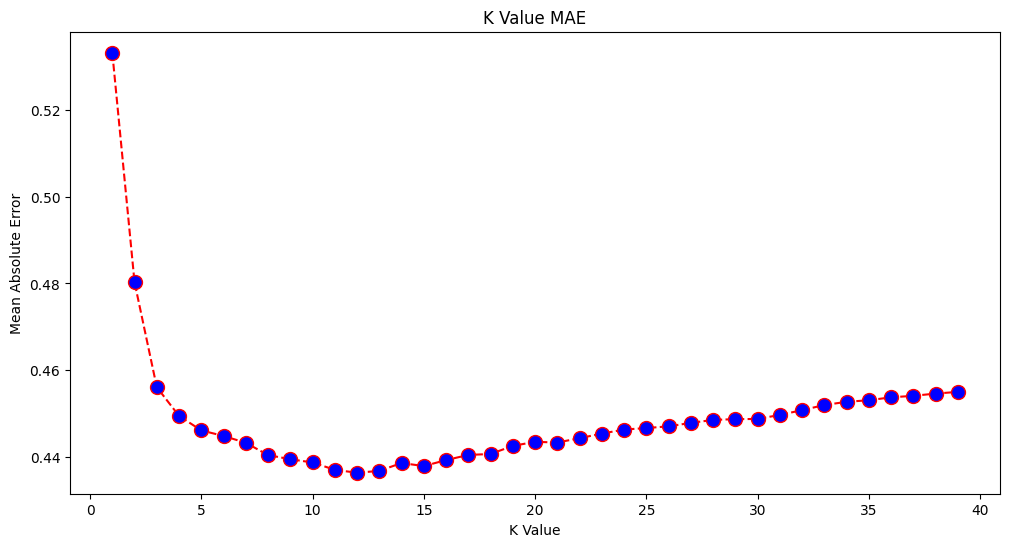

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Let's get a closer look at the plot to be sure by plotting less data

Text(0, 0.5, 'Mean Absolute Error')

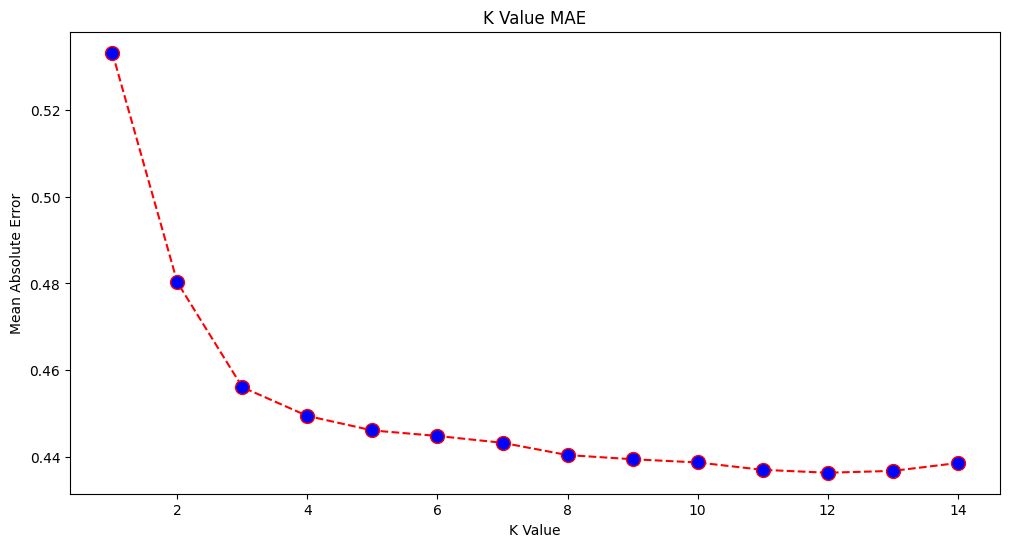

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

This means that we need 12 neighbors to be able to predict a point with the lowest MAE error. We can execute the model and metrics again with 12 neighbors to compare results

In [17]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test)

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6887495617137436, 
mae: 0.43631325936692505 
mse: 0.4118522151025172 
rmse: 0.6417571309323467


It is not a very large improvement, but it is an improvement nonetheless.

# Classification using K-Nearest Neighbors with Scikit-Learn

create the data bins to transform our continuous values into categories

In [18]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])


In [19]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

In [20]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Feature Scaling for Classification

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predicting for Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluating KNN for Classification


In [25]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.6191860465116279


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



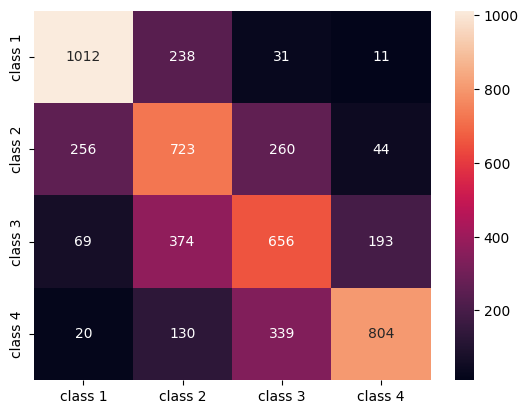

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

**By looking at the confusion matrix, we can see that:**

class 1 was mostly mistaken for class 2 in 238 cases
class 2 for class 1 in 256 entries, and for class 3 in 260 cases
class 3 was mostly mistaken by class 2, 374 entries, and class 4, in 193 cases
class 4 was wrongly classified as class 3 for 339 entries, and as class 2 in 130 cases.

# Finding the Best K for KNN Classification

In [28]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

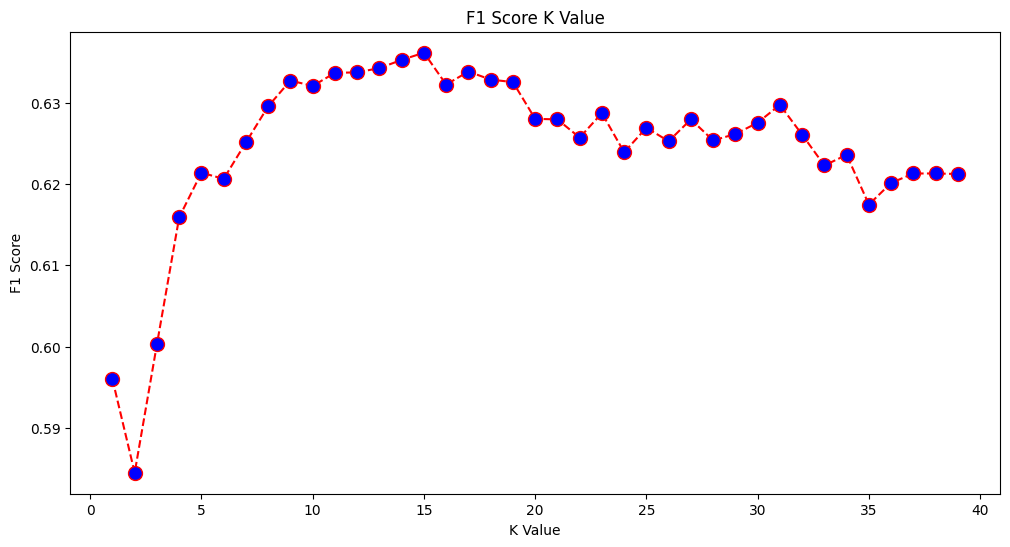

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [30]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



Notice that our metrics have improved with 15 neighbors, we have 63% accuracy and higher precision, recall, and f1-scores, but we still need to further look at the bins to try to understand why the f1-score for classes 2 and 3 is still low.

Besides using KNN for regression and determining block values and for classification, to determine block classes - we can also use KNN for detecting which mean blocks values are different from most - the ones that don't follow what most of the data is doing